# Exploring Neural Networks using the Iris dataset
<img style="float: left;" src="Iris_Blue_Magic.jpg">

### In this tutorial we will build a neural network to classify irises (flowers) based on their features. 

##### We begin by importing some necessary libraries

In [11]:
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils import plot_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
%matplotlib inline

### With any problem dealing with randomness, it's a good idea to set a random seed so that results are reproducible and easier to debug.

In [12]:
seed = 123
numpy.random.seed(seed)

## Step 1: Load the data 

In [13]:
df = pandas.read_csv("Iris.csv", header=None)
dataset = df.values
X = dataset[1:,1:5].astype(float)
Y = dataset[1:,5]

#### It's a good idea to look at the data to understand what it is. In this case, we have 150 flowers that have been classified into Iris-setosa, Iris-versicolor, and Iris-virginica. The features are sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm.

In [14]:
df.head(5)

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


#### Why do we need machine learning for this problem?
##### As you can see from the plots below, Iris-setosa is linearly separable from the other two types but Iris-virginica and Iris-versicolor cannot be separated by a line or plane.

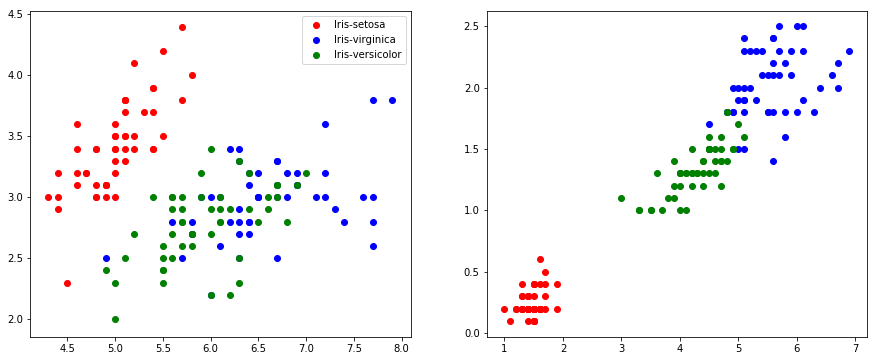

In [15]:
index = [numpy.nonzero(Y=='Iris-setosa')[0].ravel(),numpy.nonzero(Y=='Iris-virginica')[0].ravel(),numpy.nonzero(Y=='Iris-versicolor')[0].ravel()]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(X[index[0],0],X[index[0],1],color='r',label='Iris-setosa')
plt.scatter(X[index[1],0],X[index[1],1],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],0],X[index[2],1],color='g',label = 'Iris-versicolor')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X[index[0],2],X[index[0],3],color='r',label='Iris-setosa')
plt.scatter(X[index[1],2],X[index[1],3],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],2],X[index[2],3],color='g',label = 'Iris-versicolor')
plt.show()

## Step 2: Encode the output variable

In [16]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
ylabel = encoder.transform(['Iris-setosa','Iris-virginica','Iris-versicolor'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

## Step 3: Build the neural network

In [19]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

## Step 4: Train the neural network
#### Run cross validation

#### Train the network and plot prediction

In [26]:
model = baseline_model();
model.fit(X,dummy_y,epochs=250,verbose=1)
y_pred = model.predict_classes(X)

Epoch 1/250
150/150 [==============================] - 0s 3ms/step - loss: 2.2843 - acc: 0.0867
Epoch 2/250
150/150 [==============================] - 0s 68us/step - loss: 2.1416 - acc: 0.0267
Epoch 3/250
150/150 [==============================] - 0s 105us/step - loss: 2.0133 - acc: 0.0133
Epoch 4/250
150/150 [==============================] - 0s 119us/step - loss: 1.9000 - acc: 0.0067
Epoch 5/250
150/150 [==============================] - 0s 90us/step - loss: 1.8092 - acc: 0.0000e+00
Epoch 6/250
150/150 [==============================] - 0s 85us/step - loss: 1.7273 - acc: 0.0000e+00
Epoch 7/250
150/150 [==============================] - 0s 76us/step - loss: 1.6620 - acc: 0.0000e+00
Epoch 8/250
150/150 [==============================] - 0s 107us/step - loss: 1.6138 - acc: 0.0000e+00
Epoch 9/250
150/150 [==============================] - 0s 108us/step - loss: 1.5744 - acc: 0.0000e+00
Epoch 10/250
150/150 [==============================] - 0s 83us/step - loss: 1.5400 - acc: 0.0000e+00
Ep

150/150 [==============================] - 0s 61us/step - loss: 0.6308 - acc: 0.7733
Epoch 85/250
150/150 [==============================] - 0s 128us/step - loss: 0.6258 - acc: 0.7800
Epoch 86/250
150/150 [==============================] - 0s 66us/step - loss: 0.6208 - acc: 0.7933
Epoch 87/250
150/150 [==============================] - 0s 63us/step - loss: 0.6160 - acc: 0.7933
Epoch 88/250
150/150 [==============================] - 0s 64us/step - loss: 0.6114 - acc: 0.7933
Epoch 89/250
150/150 [==============================] - 0s 59us/step - loss: 0.6068 - acc: 0.7933
Epoch 90/250
150/150 [==============================] - 0s 61us/step - loss: 0.6024 - acc: 0.7933
Epoch 91/250
150/150 [==============================] - 0s 61us/step - loss: 0.5980 - acc: 0.7933
Epoch 92/250
150/150 [==============================] - 0s 61us/step - loss: 0.5938 - acc: 0.8133
Epoch 93/250
150/150 [==============================] - 0s 64us/step - loss: 0.5895 - acc: 0.8267
Epoch 94/250
150/150 [==========

150/150 [==============================] - 0s 58us/step - loss: 0.3974 - acc: 0.9667
Epoch 168/250
150/150 [==============================] - 0s 58us/step - loss: 0.3955 - acc: 0.9667
Epoch 169/250
150/150 [==============================] - 0s 57us/step - loss: 0.3938 - acc: 0.9667
Epoch 170/250
150/150 [==============================] - 0s 59us/step - loss: 0.3917 - acc: 0.9667
Epoch 171/250
150/150 [==============================] - 0s 59us/step - loss: 0.3901 - acc: 0.9667
Epoch 172/250
150/150 [==============================] - 0s 59us/step - loss: 0.3882 - acc: 0.9667
Epoch 173/250
150/150 [==============================] - 0s 59us/step - loss: 0.3863 - acc: 0.9667
Epoch 174/250
150/150 [==============================] - 0s 56us/step - loss: 0.3845 - acc: 0.9667
Epoch 175/250
150/150 [==============================] - 0s 59us/step - loss: 0.3828 - acc: 0.9667
Epoch 176/250
150/150 [==============================] - 0s 56us/step - loss: 0.3810 - acc: 0.9667
Epoch 177/250
150/150 [=

150/150 [==============================] - 0s 62us/step - loss: 0.2739 - acc: 0.9733
Epoch 250/250
150/150 [==============================] - 0s 90us/step - loss: 0.2727 - acc: 0.9733


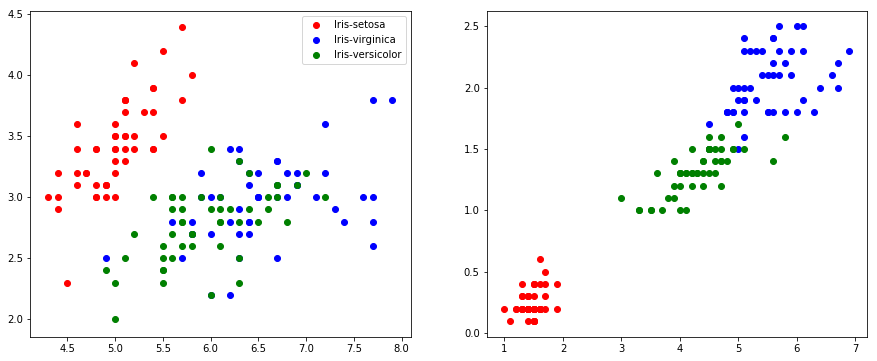

In [25]:
index = [numpy.nonzero(y_pred==ylabel[0])[0].ravel(),numpy.nonzero(y_pred==ylabel[1])[0].ravel(),numpy.nonzero(y_pred==ylabel[2])[0].ravel()]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(X[index[0],0],X[index[0],1],color='r',label='Iris-setosa')
plt.scatter(X[index[1],0],X[index[1],1],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],0],X[index[2],1],color='g',label = 'Iris-versicolor')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X[index[0],2],X[index[0],3],color='r',label='Iris-setosa')
plt.scatter(X[index[1],2],X[index[1],3],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],2],X[index[2],3],color='g',label = 'Iris-versicolor')
plt.show()